# Spectrogram of Seismic Time Series

Plots a nice spectrogram with an especially nice time axis.

In [2]:
import obspy
import numpy as np
from obspy import UTCDateTime
import pandas as pd
import os
import math
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/home/koepflma/project1/Mt-St-Helens/RSAM_DSAR//{}_{}_extended2.csv'.format(2004,'EDM'))
df.set_index('time',inplace=True)
df.index = pd.to_datetime(df.index).tz_localize(None)
df = df.resample('10min').median()
df

rsam          mf          hf      dsar     ldsar  \
time                                                                          
2004-01-01 00:00:00   11.653515    7.148557    9.784118  1.802293  2.755631   
2004-01-01 00:10:00   11.367888    7.630036   10.780168  1.621281  2.705168   
2004-01-01 00:20:00   10.714017    7.637466   10.231238  1.614559  2.516833   
2004-01-01 00:30:00   10.909018    7.033759   12.038647  1.403196  2.791032   
2004-01-01 00:40:00   10.868660    7.320254   11.634683  1.362160  2.661332   
...                         ...         ...         ...       ...       ...   
2004-12-31 22:50:00  966.593817  497.022809  196.726110  4.256895  3.565005   
2004-12-31 23:00:00  968.084502  493.385955  198.959068  4.142350  3.566242   
2004-12-31 23:10:00  919.066680  496.921838  190.790459  4.373254  3.309116   
2004-12-31 23:20:00  898.498349  468.315219  191.697231  4.052727  3.488711   
2004-12-31 23:30:00  910.748340  485.172265  196.702414  4.087874  3.404387   

                         vsar       rms          rmes       pgv       pga  \
time                                                                        
2004-01-01 00:00:00  0.730630  0.000001  8.084819e-07  0.000006  0.000229   
2004-01-01 00:10:00  0.707784  0.000002  9.298050e-07  0.000006  0.000336   
2004-01-01 00:20:00  0.746485  0.000002  9.780002e-07  0.000006  0.000215   
2004-01-01 00:30:00  0.584265  0.000002  9.442388e-07  0.000007  0.000238   
2004-01-01 00:40:00  0.629175  0.000002  7.436405e-07  0.000005  0.000215   
...                       ...       ...           ...       ...       ...   
2004-12-31 22:50:00  2.526471  0.000015  1.250154e-06  0.000190  0.004271   
2004-12-31 23:00:00  2.479836  0.000002  1.045279e-06  0.000022  0.000697   
2004-12-31 23:10:00  2.604542  0.000002  1.028408e-06  0.000011  0.000416   
2004-12-31 23:20:00  2.442994  0.000002  9.492440e-07  0.000009  0.000289   
2004-12-31 23:30:00  2.466529  0.000002  9.702505e-07  0.000010  0.000401   

                     zsc2_rsam    zsc2_mf   zsc2_hf  zsc2_dsar  zsc2_ldsar  \
time                                                                         
2004-01-01 00:00:00   0.199171   0.150414  0.192862   0.146918    1.386840   
2004-01-01 00:10:00   0.199171   0.150414  0.192862   0.146918    1.386840   
2004-01-01 00:20:00   0.188128   0.161108  0.204033   0.143745    0.924278   
2004-01-01 00:30:00   0.188128   0.147870  0.204033   0.068760    0.924278   
2004-01-01 00:40:00   0.190742   0.147870  0.239911   0.058829    1.265114   
...                        ...        ...       ...        ...         ...   
2004-12-31 22:50:00  14.363687  12.109787  8.158984  17.145049    6.546867   
2004-12-31 23:00:00  14.363687  13.031527  8.465086  20.331010    6.546867   
2004-12-31 23:10:00  13.682977  13.031527  8.144508  20.331010    4.306650   
2004-12-31 23:20:00  13.387986  12.334761  8.144508  18.123137    4.306650   
2004-12-31 23:30:00  13.387986  12.334761  8.193316  18.123137    5.051888   

                     zsc2_vsar  zsc2_rms  zsc2_rmes  zsc2_pgv  zsc2_pga  
time                                                                     
2004-01-01 00:00:00   0.088321  0.258847   0.392133  0.253254  0.397689  
2004-01-01 00:10:00   0.088321  0.258847   0.392133  0.253254  0.397689  
2004-01-01 00:20:00   0.088321  0.318035   0.477300  0.253197  0.363910  
2004-01-01 00:30:00   0.036308  0.318035   0.487749  0.253197  0.363910  
2004-01-01 00:40:00   0.036308  0.307277   0.348654  0.231253  0.364492  
...                        ...       ...        ...       ...       ...  
2004-12-31 22:50:00  25.786768  0.344067   0.527821  0.607930  0.564820  
2004-12-31 23:00:00  29.511171  0.447867   0.562678  1.056623  1.750308  
2004-12-31 23:10:00  29.511171  0.355833   0.549953  0.484019  0.879267  
2004-12-31 23:20:00  27.533114  0.317528   0.491387  0.394658  0.542235  
2004-12-31 23:30:00  27.533114  0.317528   0.491387  0.394658  0.542235  

[52702 rows x 20 co

In [105]:
plt.vlines(np.where(np.isnan(data))[0], 0, 1600, color='C1')
plt.plot(data)

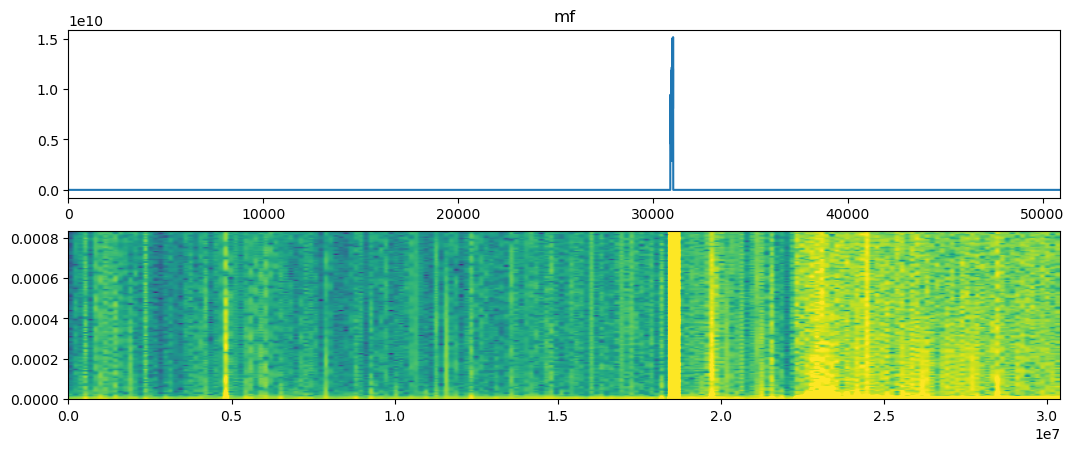

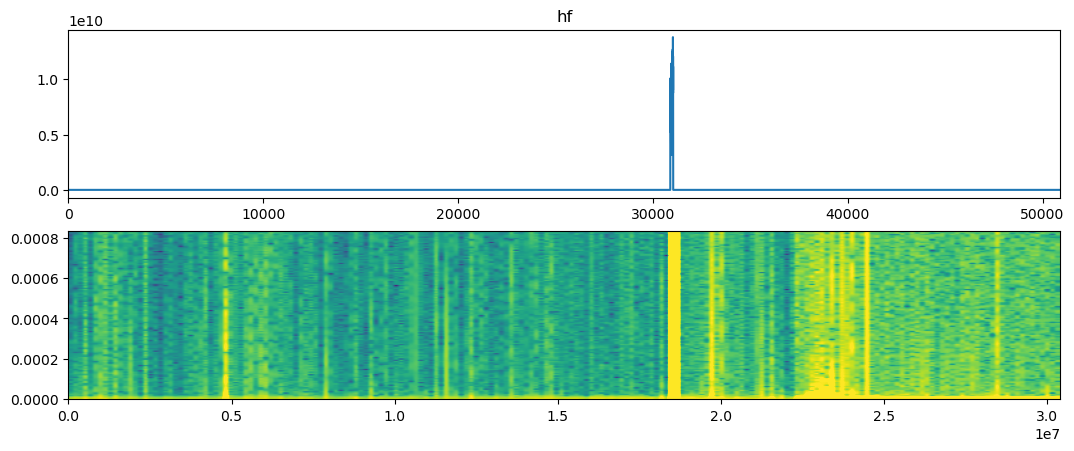

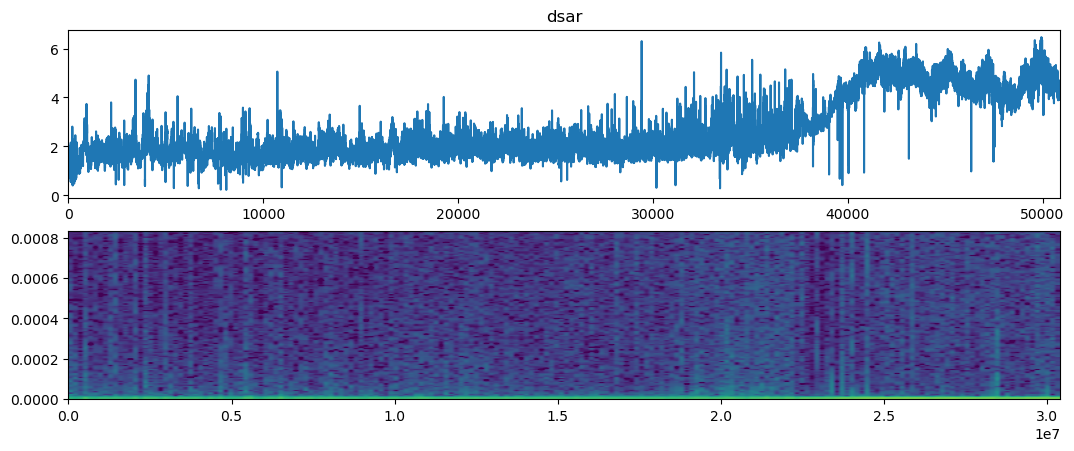

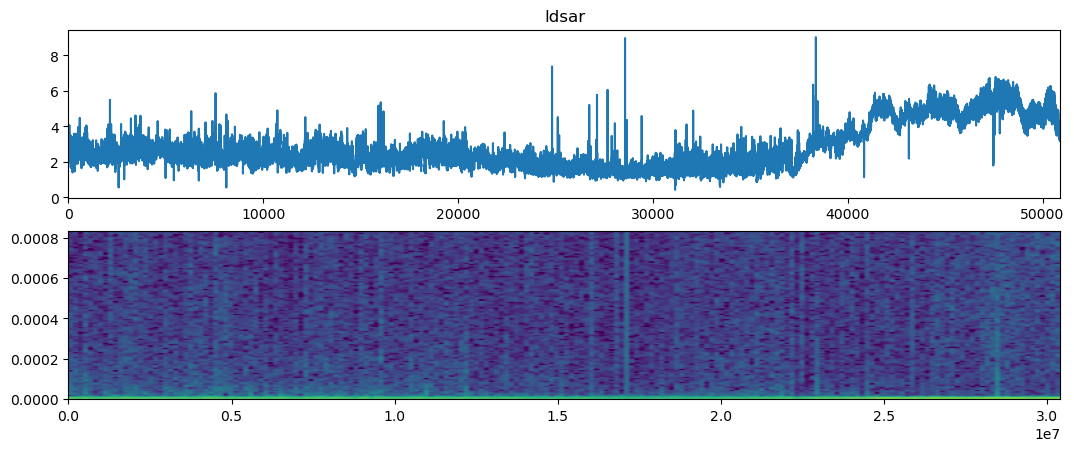

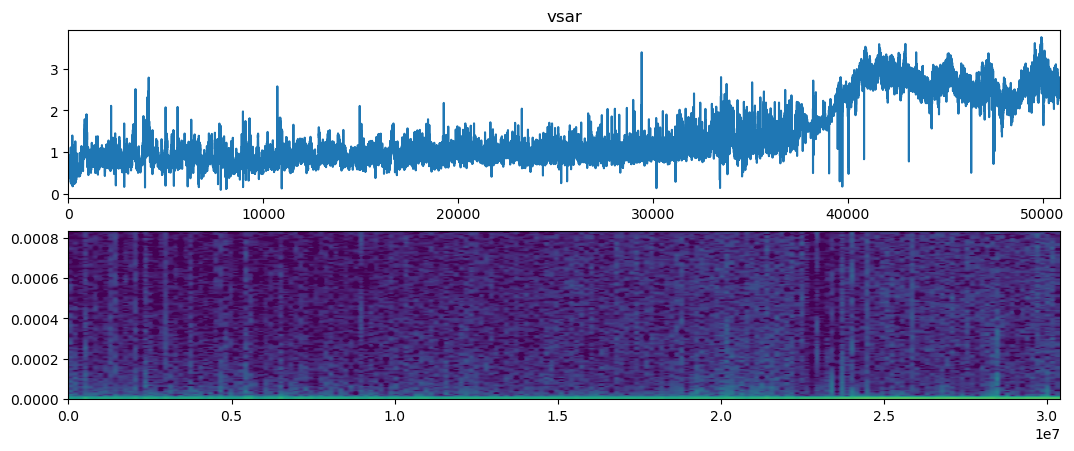

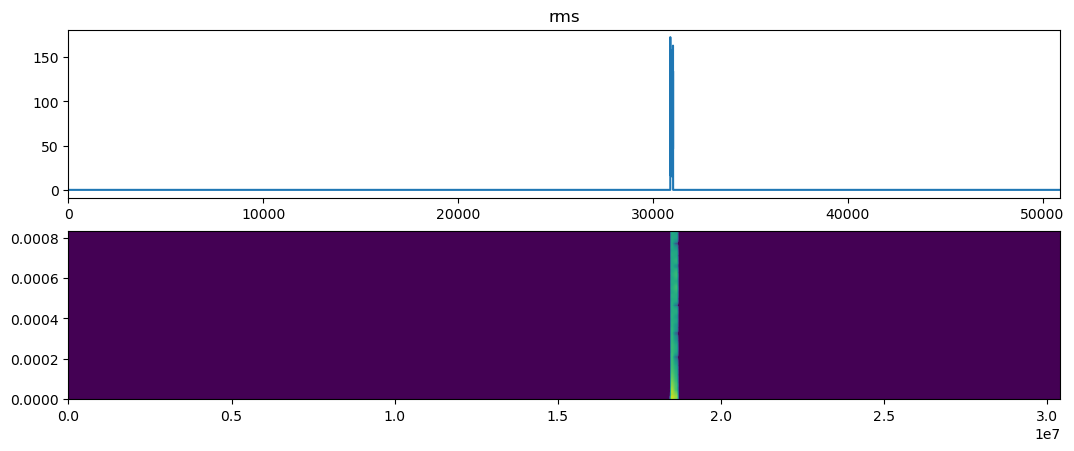

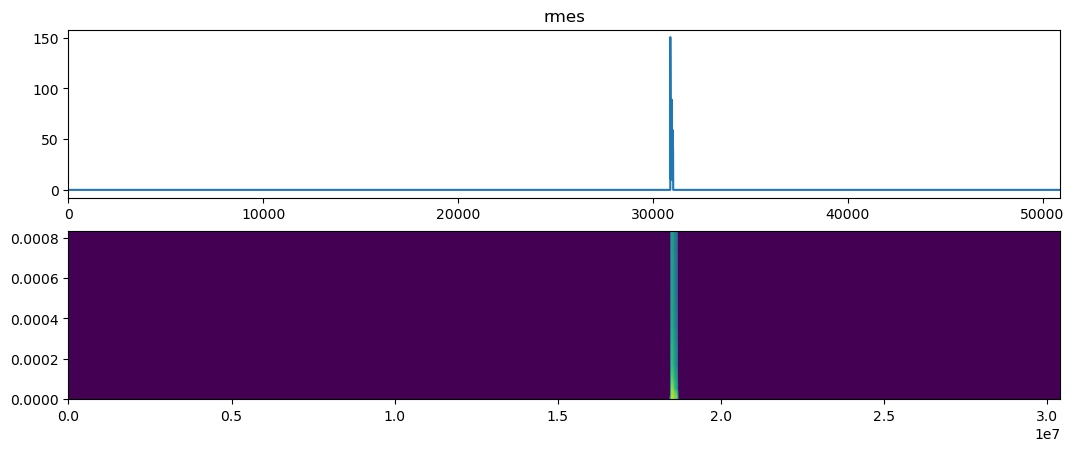

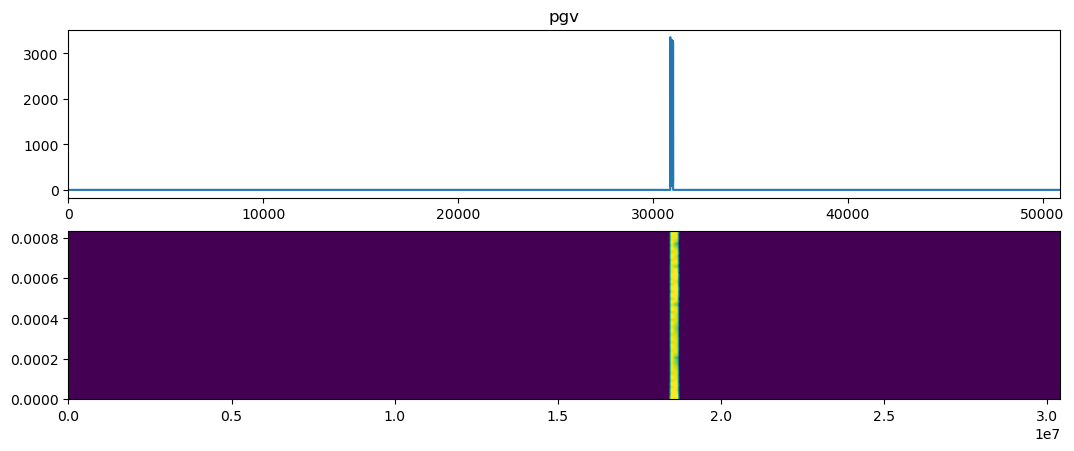

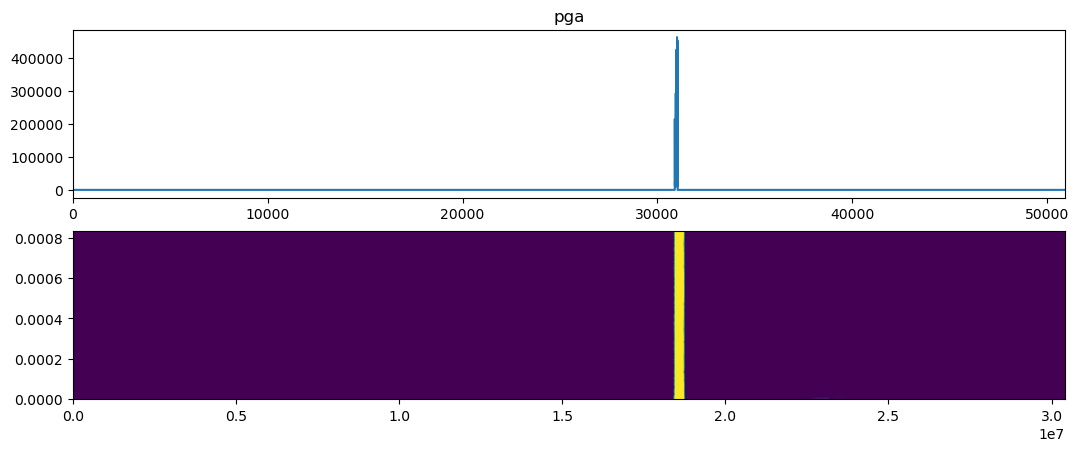

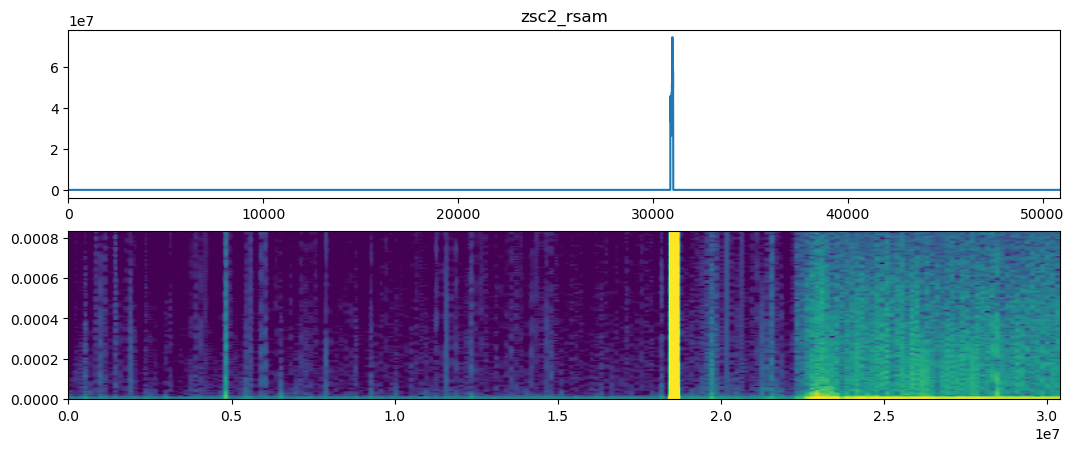

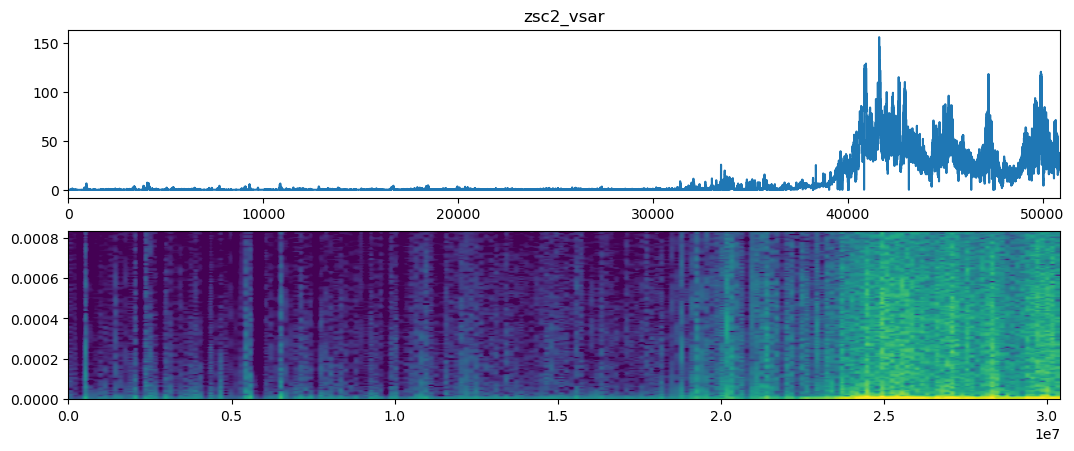

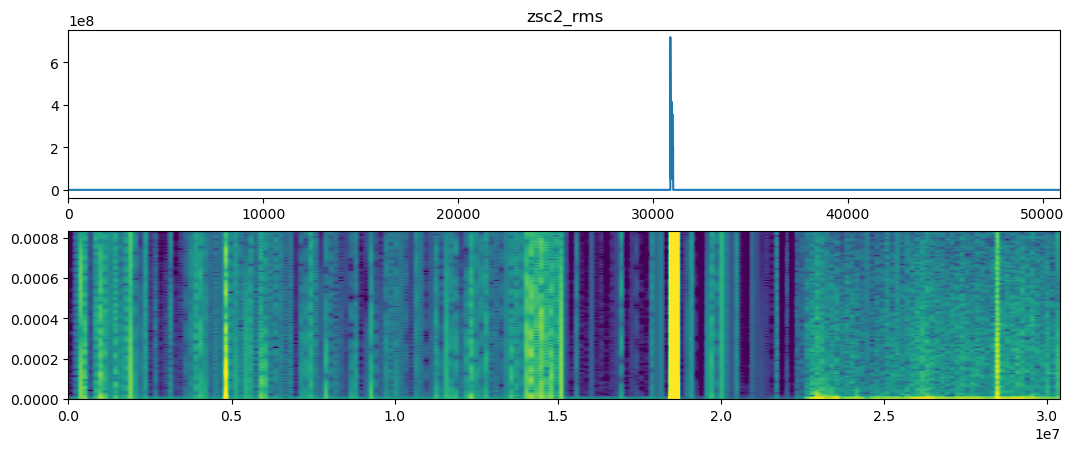

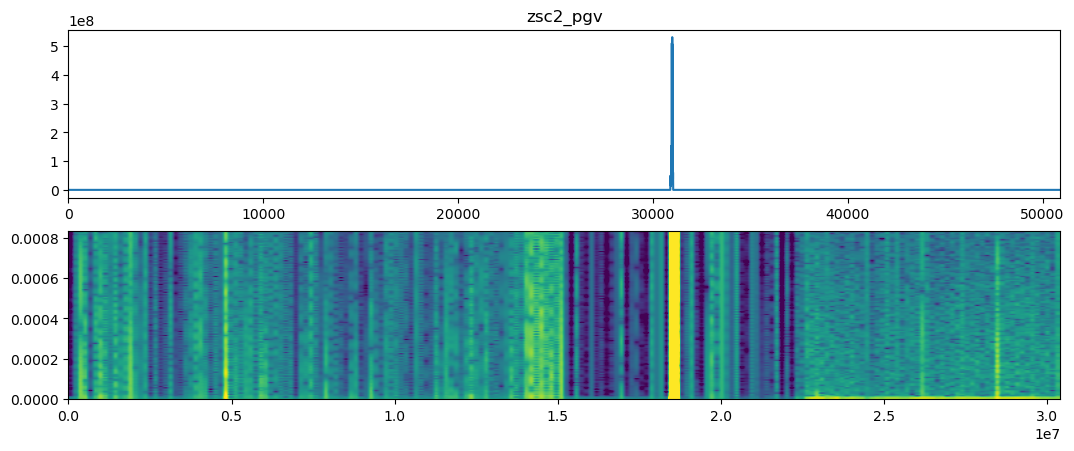

In [7]:
for i in df.columns:
    data = df[i].dropna().to_numpy()
    
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(6.4*2, 4.8))
    ax1.set_title(i)
    ax1.plot(data)
    ax1.set_xlim(0,len(data))
    Pxx, freqs, bins,ax2 = plt.specgram(data, 
                                    NFFT=2**8, 
                                    Fs=1/600, 
                                    noverlap=0,
                                    mode='psd',
                                    scale='dB', vmax=80,vmin=0)
#     plt.show()
#     plt.colorbar()